# Oscillations, Waves and Optics Question 31
An aperture lies in the $x$-$y$ plane at $z = 0$, and consists of a long slit of width $d$. The slit is transparent in the region $|y| < d/2$; elsewhere it blocks incoming light. It is illuminated at normal incidence by a plane wave of wavelength $\lambda$ travelling in the $z$ direction. The diffraction pattern is observed on a screen at $z = D$ parallel to the aperture. The complex diffraction pattern observed on the screen at coordinate $(0,Y,D)$ can be written in the approximate form
$$
\psi(Y)=\int_{-d/2}^{d/2}\exp(\mathrm ikr)K(\theta)\ \mathrm dy,
$$
where $k = 2π/\lambda$, $r =\sqrt{(Y-y)^2+D^2}$, $\tan\theta=(Y-y)/D$ and $K(\theta)$ is the obliquity factor. Explain the origin of this equation in terms of Huygens’ construction. Use MATLAB (or another language) to compute the complex diffraction pattern $\psi(Y)$ by integration. Use the values $\lambda = 500\ {\rm nm}$, $d = 1\ {\rm mm}$, and assume the obliquity factor is unity: $K(\theta) = 1$. Plot the diffracted intensity $|\psi(Y )|^2$ for $D =10\ {\rm mm}$, $100\ {\rm mm}$, $326\ {\rm mm}$, and $640\ {\rm mm}$ and $4000\ {\rm mm}$ and comment on the patterns as $D$ varies (recall the Fresnel distance is $d^2/\lambda$). [You will need to use an integration routine such as scipy.integrate.quad in Python or quad / quadgk in MATLAB. You can check some of your patterns against Fig. 10.70 in Hecht’s Optics book.]

Huygens' principle states that the wavefront propagates as the evenlop of spherical waves from the original wavefront. The obliquity factor is given to restrict the direction of propagation, and the exponential term measures the phase of each spherical wave. 

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
Dvalues = [10e-3, 100e-3, 326e-3, 640e-3, 4000e-3] # in m
Kvalue = 1
d = 1e-3 # m
Lambda = 500e-9 # m 
yvalues = np.linspace(-d/2, d/2, 1000)
k = 2*np.pi/Lambda # the wavenumber
Yvalues = np.linspace(-5e-3, 5e-3, 5000) # in m

# Function to compute the diffraction pattern psi(Y)
def compute_diffraction_pattern(Y, D, d, k):
    psi = np.zeros_like(Y, dtype=complex)
    for i, y in enumerate(Y):
        integral = 0
        # We perform the integral over the slit region [-d/2, d/2]
        for y_s in np.linspace(-d/2, d/2, 1000):  # Numerically integrating over the slit
            r = np.sqrt((y - y_s)**2 + D**2)
            integral += np.exp(1j * k * r)  # obliquity factor is assumed to be unity
        psi[i] = integral / 1000  # Normalize by the number of points in the slit
    return psi

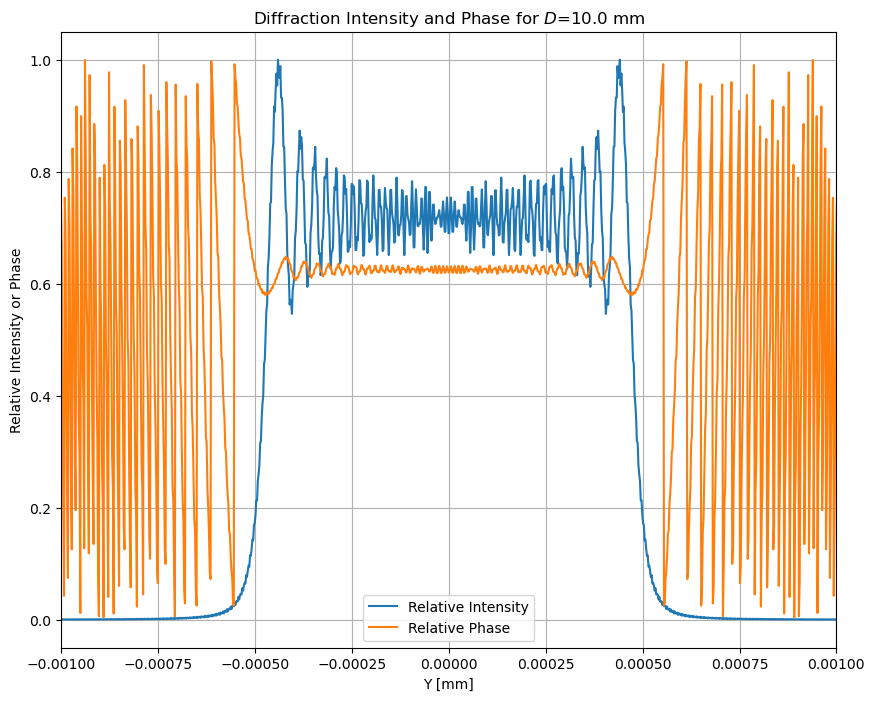

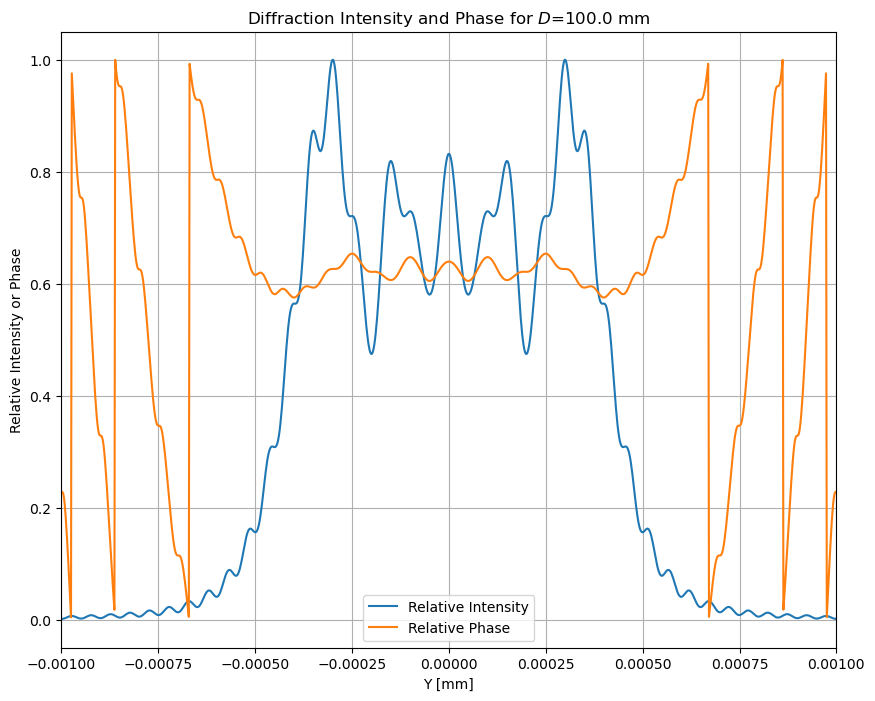

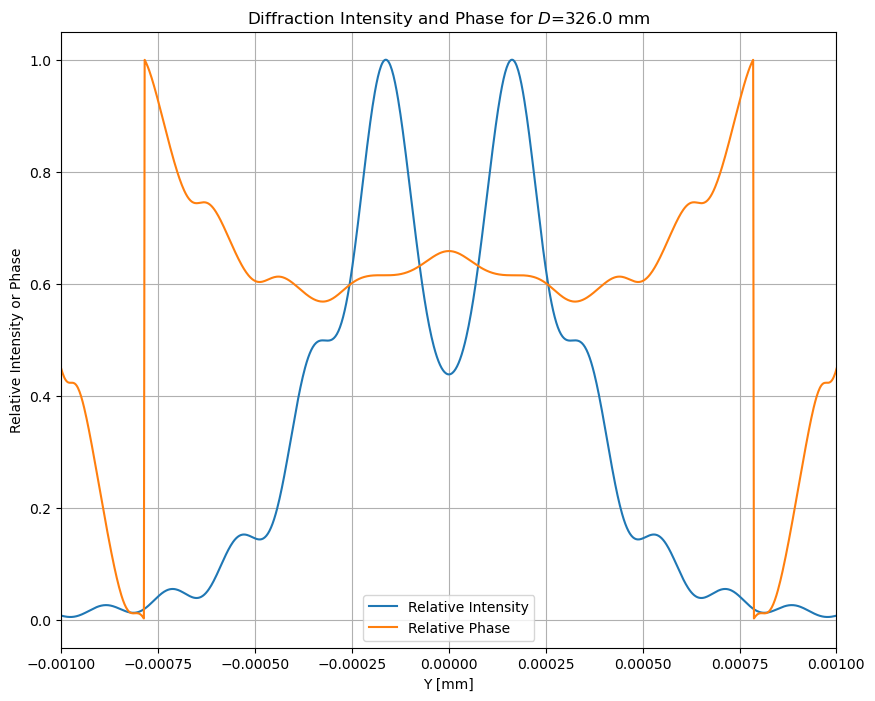

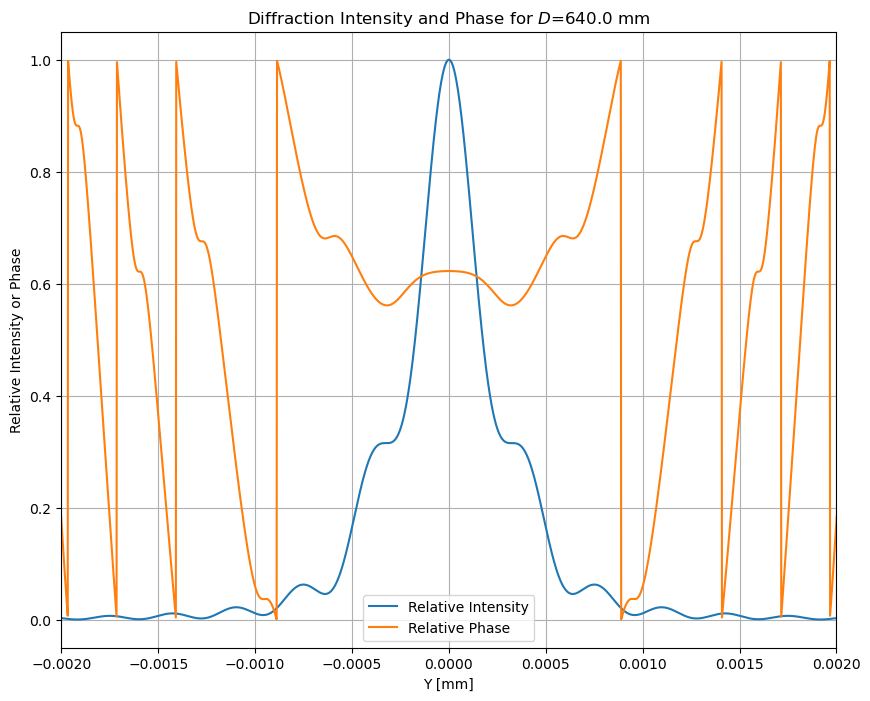

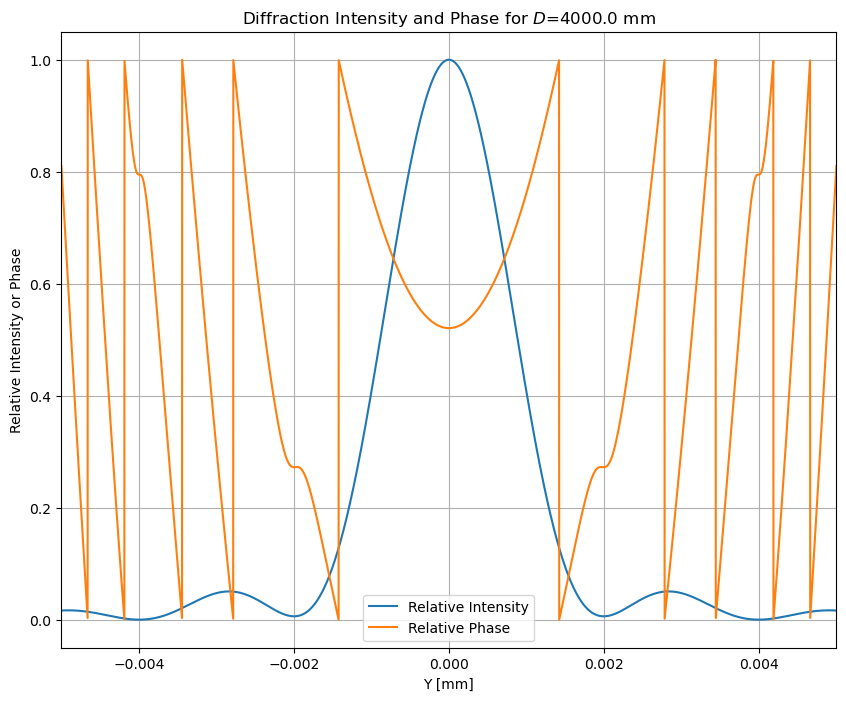

In [2]:
# Plot diffraction patterns for different D values
relative_intensity = []
relative_phase = []
for D in Dvalues:
    psi_Y = compute_diffraction_pattern(Yvalues, D, d, k)
    intensity = np.abs(psi_Y)**2
    relative_intensity.append(intensity / np.max(intensity))
    phase = 0.5 + (np.arctan2(np.imag(psi_Y), np.real(psi_Y)) / (2 * np.pi))
    relative_phase.append(phase)

xlimits = [1e-3, 1e-3, 1e-3, 2e-3, 5e-3]
for i in range(len(Dvalues)):
    plt.figure(figsize=(10, 8))
    plt.plot(Yvalues, relative_intensity[i], label='Relative Intensity')
    plt.plot(Yvalues, relative_phase[i], label='Relative Phase')
    plt.xlim(-xlimits[i], xlimits[i])
    plt.xlabel(f'Y [mm]')
    plt.ylabel(f'Relative Intensity or Phase')
    plt.title(f'Diffraction Intensity and Phase for $D$={Dvalues[i]*1e3:.1f} mm')
    plt.legend()
    plt.grid(True)
    plt.show()